# B 旅行

## 結論

- 旅行は閲覧数、クリック数、カート投入数、購入数の全てが十分にある
- 商品視点
    - カート投入数と購入数の相関係数は0.8で強い関連性がある
    - カート投入数と閲覧数、閲覧数と購入数にも関連性がある
    - 異常な商品は非常に少ない  
- ユーザー視点
    - カート投入数と購入数には関連性が見られる
    -　異常なユーザーは非常に少ない   
- 全体
     - 旅行のデータは比較的綺麗なデータで予測は立てやすいと思われる
     - グループ分けすると売れない（買わない）、売れる（買う）、めっちゃ売れる（めっちゃ買う）の三種類
- 時間に関連した行動分析（軽め）
     - 基本的に閲覧、カート、購入の流れだが、一部クリックもある。
     - クリックのタイミングはまちまち
     - 購入後の閲覧、カート投入後の閲覧も少数だが見られる。
-  今後に向けて
     - 閲覧回数とカート投入、購入の関連性の分析
     - 何をもって閲覧１回とするか（３０秒後の閲覧は２回目？）


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from IPython.core.display import display
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("train_B.tsv", delimiter='\t')

In [3]:
dfs = []
labels = ["ca", "pd", "cl", "cv"]
for i, label in enumerate(labels):
    dic = {"id":i, "label":label, "df":df[df["event_type"] == i]}
    dfs.append(dic)

# 商品視点

In [4]:
c_dfs= []
for df_item in dfs:
    new_df = pd.DataFrame(df_item["df"].groupby("product_id").size(), columns=["count_" + str(df_item["id"])])
    dic = {"id":df_item["id"], "label":df_item["label"], "df":new_df}
    c_dfs.append(dic)
count_df = pd.concat([c_dfs[0]["df"],c_dfs[1]["df"],c_dfs[2]["df"],c_dfs[3]["df"]], axis=1).fillna(0)
count_df.columns=['count_cart','count_read','count_click','count_conversion']
count_df.head()

,count_cart,count_read,count_click,count_conversion
00000000_b,0.0,4,0.0,0.0
00000001_b,5.0,91,0.0,2.0
00000002_b,0.0,17,0.0,0.0
00000003_b,0.0,25,0.0,0.0
00000004_b,32.0,176,1.0,7.0


###### 相関行列

In [5]:
count_df.corr()

,count_cart,count_read,count_click,count_conversion
count_cart,1.000000,0.729275,0.365355,0.804943
count_read,0.729275,1.000000,0.326186,0.618073
count_click,0.365355,0.326186,1.000000,0.337303
count_conversion,0.804943,0.618073,0.337303,1.000000


###### 散布図

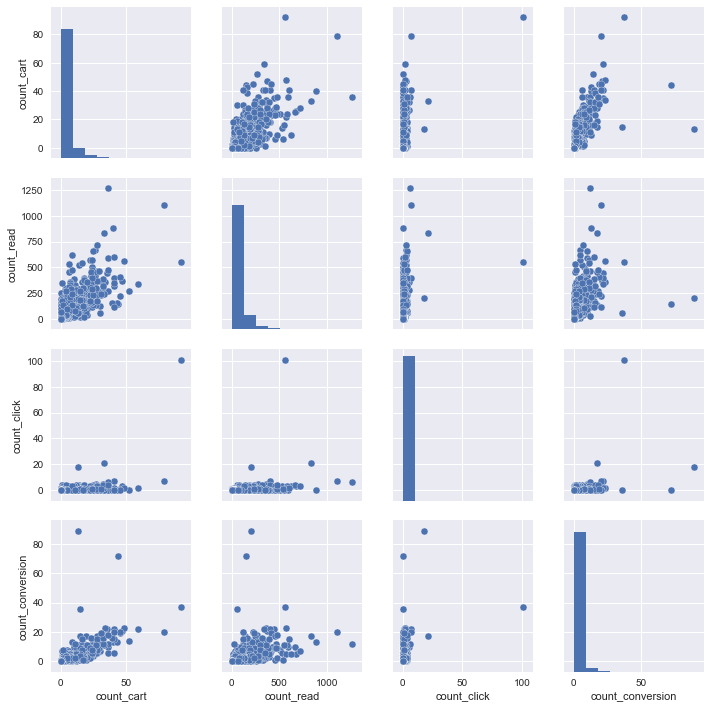

In [6]:
df_sampled = count_df.sample(n=3000, random_state=3)
sns.pairplot(df_sampled[['count_cart', 'count_read','count_click', 'count_conversion']])
sns.plt.show()

### 旅行は商品に関して購入数、閲覧数、カートへの投入数に関連がありそう

・結論  
（カート投入数と購入数）には比較的強い相関関係が見られ,
（カート投入数と閲覧）、（閲覧と購入数）にも相関関係がありそう  
  カート投入数と購入数＞閲覧数とカート投入数＞購入数と閲覧数>クリック数とその他３項目

次はとりあえず購入数と閲覧数について見てみる

### 購入数とカート投入数

In [7]:


absense_bins = [0,5,10,15,20,25,30,35,40,50,60,70,80,90,100,110]
cut_result_0 = pd.cut(count_df.count_cart, absense_bins, right=False)

absense_bins = [0,5,10,15,20,25,30,35,40,45,50,550]
cut_result_3 = pd.cut(count_df.count_conversion, absense_bins, right=False)

merged_count_df = pd.concat([cut_result_0, cut_result_3],axis=1)
count_cart_count_conversion_cross_table = pd.pivot_table(merged_count_df, index=["count_cart"], columns=["count_conversion"], aggfunc=lambda x: len(x), fill_value=0)
count_cart_count_conversion_cross_table

count_conversion,"[0, 5)","[5, 10)","[10, 15)","[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[45, 50)","[50, 550)"
count_cart,,,,,,,,,,
"[0, 5)",13395,44,4,1,0,0,0,0,0,0
"[5, 10)",1505,248,7,2,0,0,1,0,0,0
"[10, 15)",411,309,31,2,0,0,1,0,0,1
"[15, 20)",115,185,60,6,0,0,0,1,0,0
"[20, 25)",45,100,56,10,1,0,0,0,0,0
"[25, 30)",7,55,52,18,0,0,0,0,0,0
"[30, 35)",4,25,26,17,4,0,0,0,0,0
"[35, 40)",2,12,14,11,2,0,0,0,0,0
"[40, 50)",4,9,13,17,9,2,1,0,0,1


In [8]:
target_df03=count_df.reset_index().rename(columns = {"index":"product_id"})

In [9]:
count_df03 = count_df.reset_index().rename(columns={"index":"user_id"})
target_df03 = count_df03[["user_id","count_cart","count_conversion"]]

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(target_df03[["count_cart","count_conversion"]])
target_df_std03 = sc.transform(target_df03[["count_cart","count_conversion"]])

In [11]:
from sklearn.cluster import KMeans
X = target_df_std03
dist_list =[]
for i in range(1,20):
    kmpp = KMeans(n_clusters=i,init="random",n_init=5,max_iter=100,random_state=0) 
    kmpp.fit(X)
    dist_list.append(kmpp.inertia_)

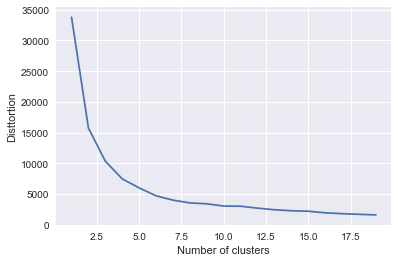

In [12]:
plt.plot(range(1,20),dist_list,marker='+')
plt.xlabel("Number of clusters")
plt.ylabel("Disttortion")

In [13]:
from sklearn.cluster import KMeans
X=target_df_std03
kmpp = KMeans(n_clusters = 3, init="random",random_state=0)
kmpp.fit(X)
label_df = pd.DataFrame(kmpp.labels_, columns=["cluster"])

In [14]:
label_df.groupby("cluster").size()

cluster
0    14660
1     1993
2      241
dtype: int64

In [15]:
clustered_df03 = pd.concat([target_df03,label_df],axis=1)

absense_bins = [0,10,20,30,40,50,100,150,200,250,300,350,400,500,1100]
cut_result = pd.cut(clustered_df03.count_cart, absense_bins, right=False)
merged_clusterd_df = pd.concat([clustered_df03.cluster, cut_result], axis=1)
cluster_count_0_cross_table = pd.pivot_table(merged_clusterd_df, index=["cluster"], columns=["count_cart"],aggfunc=lambda x : len(x), fill_value = 0)
display(cluster_count_0_cross_table)

absense_bins = [0,1,2,3,4,5,10,15,20,25,30,35,40,45,50,100] 
cut_result = pd.cut(clustered_df03.count_conversion, absense_bins, right=False)
merged_clusterd_df = pd.concat([clustered_df03.cluster, cut_result], axis=1)
cluster_count_1_cross_table = pd.pivot_table(merged_clusterd_df, index=["cluster"], columns=["count_conversion"],aggfunc=lambda x : len(x), fill_value = 0)
display(cluster_count_1_cross_table)


count_cart,"[0, 10)","[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 100)","[100, 150)"
cluster,,,,,,,
0,14610,50,0,0,0,0,0
1,596,1066,290,37,4,0,0
2,1,6,54,80,52,42,6


count_conversion,"[0, 1)","[1, 2)","[2, 3)","[3, 4)","[4, 5)","[5, 10)","[10, 15)","[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 100)"
cluster,,,,,,,,,,,,,,,
0,10673,2248,1108,516,109,6,0,0,0,0,0,0,0,0,0
1,3,40,133,262,396,966,185,8,0,0,0,0,0,0,0
2,0,0,0,0,1,20,84,86,25,4,10,5,1,1,3


In [16]:
for i in range(0,3):
    display_df = pd.DataFrame()
    display_target_df = clustered_df03[clustered_df03["cluster"] == i][["count_cart","count_conversion"]]
    if display_df.empty:
        display_df = display_target_df.describe().T
    else:
        display_df = pd.concat([display_df, display_target_df.describe().T])
    display(display_df)
    print("cluster_" + str(i))

,count,mean,std,min,25%,50%,75%,max
count_cart,14660.0,1.084106,1.977244,0.0,0.0,0.0,1.0,12.0
count_conversion,14660.0,0.441883,0.840491,0.0,0.0,0.0,1.0,5.0


cluster_0


,count,mean,std,min,25%,50%,75%,max
count_cart,1993.0,13.423984,6.322759,1.0,9.0,12.0,17.0,45.0
count_conversion,1993.0,5.533367,2.708386,0.0,4.0,5.0,7.0,19.0


cluster_1


,count,mean,std,min,25%,50%,75%,max
count_cart,241.0,41.460581,19.974971,5.0,29.0,36.0,46.0,141.0
count_conversion,241.0,17.443983,11.452710,4.0,12.0,15.0,19.0,124.0


cluster_2


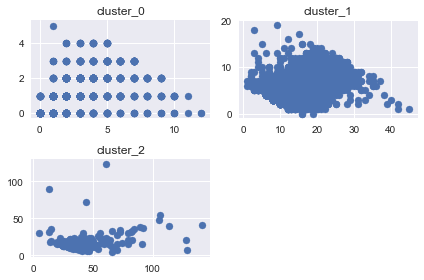

In [17]:
for i in range(0,3):
    if i == 0:
        df_sampled = clustered_df03[clustered_df03["cluster"] == i].sample(n=5000, random_state=3)
    else:
        df_sampled = clustered_df03[clustered_df03["cluster"] == i]
    plt.subplot(2, 2, i+1)
    plt.scatter(df_sampled["count_cart"],df_sampled["count_conversion"])
    plt.title("cluster_" + str(i))
plt.tight_layout()

In [18]:


absense_bins = [0,5,10,15,20,25,30,35,40,50,60,70,80,90,100,110]
cut_result_0 = pd.cut(count_df.count_cart, absense_bins, right=False)

absense_bins = [0,50,100,150,200,250,300,350,400,450,500,550]
cut_result_1 = pd.cut(count_df.count_read, absense_bins, right=False)

merged_count_df = pd.concat([cut_result_0, cut_result_1],axis=1)
count_cart_count_read_cross_table = pd.pivot_table(merged_count_df, index=["count_cart"], columns=["count_read"], aggfunc=lambda x: len(x), fill_value=0)
count_cart_count_read_cross_table

count_read,"[0, 50)","[50, 100)","[100, 150)","[150, 200)","[200, 250)","[250, 300)","[300, 350)","[350, 400)","[400, 450)","[450, 500)","[500, 550)"
count_cart,,,,,,,,,,,
"[0, 5)",10295,2135,642,231,89,29,10,6,4,2,0
"[5, 10)",333,640,379,210,102,48,27,12,5,5,1
"[10, 15)",51,178,197,147,76,48,18,11,12,4,8
"[15, 20)",7,53,77,100,43,41,21,11,5,5,1
"[20, 25)",4,22,28,41,35,28,15,12,5,9,5
"[25, 30)",0,5,16,25,27,16,7,15,2,9,1
"[30, 35)",0,4,4,13,8,9,12,10,3,5,5
"[35, 40)",0,1,1,6,2,6,6,5,3,2,4
"[40, 50)",0,4,3,7,4,4,6,7,7,3,3


In [19]:
count_df = count_df.reset_index().rename(columns={"index":"user_id"})
target_df = count_df[["user_id","count_cart","count_read"]]
target_df.head()

,user_id,count_cart,count_read
0,00000000_b,0.0,4
1,00000001_b,5.0,91
2,00000002_b,0.0,17
3,00000003_b,0.0,25
4,00000004_b,32.0,176


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(target_df[["count_cart","count_read"]])
target_df_std = sc.transform(target_df[["count_cart","count_read"]])

In [21]:
from sklearn.cluster import KMeans
X = target_df_std
dist_list =[]
for i in range(1,20):
    kmpp = KMeans(n_clusters=i,init="random",n_init=5,max_iter=100,random_state=0) 
    kmpp.fit(X)
    dist_list.append(kmpp.inertia_)

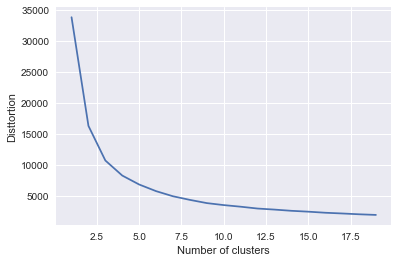

In [22]:
plt.plot(range(1,20),dist_list,marker='+')
plt.xlabel("Number of clusters")
plt.ylabel("Disttortion")

In [23]:
from sklearn.cluster import KMeans
X = target_df_std
kmpp = KMeans(n_clusters=3,init="random",random_state=0)
kmpp.fit(X)
label_df = pd.DataFrame(kmpp.labels_, columns=["cluster"])

In [24]:
label_df.groupby("cluster").size()

cluster
0    13803
1     2720
2      371
dtype: int64

In [25]:
clustered_df = pd.concat([target_df, label_df], axis=1)

absense_bins = [0,10,20,30,40,50,100,150,200,250,300,350,400,500,1100]
cut_result = pd.cut(clustered_df.count_cart, absense_bins, right=False)
merged_clusterd_df = pd.concat([clustered_df.cluster, cut_result], axis=1)
cluster_count_0_cross_table = pd.pivot_table(merged_clusterd_df, index=["cluster"], columns=["count_cart"],aggfunc=lambda x : len(x), fill_value = 0)
display(cluster_count_0_cross_table)

absense_bins = [0,10,20,30,40,50,100,150,200,250,300,350,400,450,500,550]
cut_result = pd.cut(clustered_df.count_read, absense_bins, right=False)
merged_clusterd_df = pd.concat([clustered_df.cluster, cut_result], axis=1)
cluster_count_1_cross_table = pd.pivot_table(merged_clusterd_df, index=["cluster"], columns=["count_read"],aggfunc=lambda x : len(x), fill_value = 0)
display(cluster_count_1_cross_table)

count_cart,"[0, 10)","[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 100)","[100, 150)"
cluster,,,,,,,
0,13769,34,0,0,0,0,0
1,1436,1050,225,9,0,0,0
2,2,38,119,108,56,42,6


count_read,"[0, 10)","[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 100)","[100, 150)","[150, 200)","[200, 250)","[250, 300)","[300, 350)","[350, 400)","[400, 450)","[450, 500)","[500, 550)"
cluster,,,,,,,,,,,,,,,
0,4081,2431,1772,1380,997,2608,523,11,0,0,0,0,0,0,0
1,0,1,2,7,19,429,820,744,364,190,82,32,21,8,1
2,0,0,0,0,0,5,5,25,25,41,46,61,27,38,29


In [26]:
for i in range(0,3):
    display_df=pd.DataFrame()
    display_target_df=clustered_df[clustered_df["cluster"]==i][["count_cart","count_read"]]
    if display_df.empty:
        display_df=display_target_df.describe().T
    else:
        display_df=pd.concat([display_df,display_target_df.describe().T])
    display(display_df)
    print("cluster_"+str(i))

,count,mean,std,min,25%,50%,75%,max
count_cart,13803.0,0.881547,1.754976,0.0,0.0,0.0,1.0,12.0
count_read,13803.0,31.089328,29.688350,1.0,7.0,21.0,46.0,155.0


cluster_0


,count,mean,std,min,25%,50%,75%,max
count_cart,2720.0,10.041176,6.099379,0.0,6.0,9.0,14.0,33.0
count_read,2720.0,165.304779,72.609128,17.0,114.0,154.0,201.0,534.0


cluster_1


,count,mean,std,min,25%,50%,75%,max
count_cart,371.0,35.469003,18.598343,4.0,24.0,31.0,41.0,141.0
count_read,371.0,422.862534,202.759997,69.0,295.0,382.0,507.5,1421.0


cluster_2


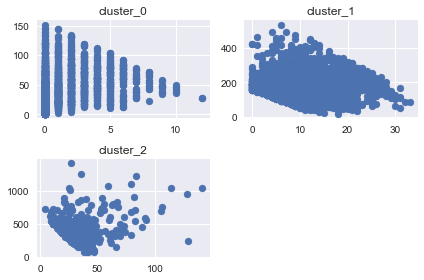

In [27]:
for i in range(0,3):
    if i ==0:
        df_sampled = clustered_df[clustered_df["cluster"] == i].sample(n=3000,random_state=3)
    else:
        df_sampled = clustered_df[clustered_df["cluster"] == i]
    plt.subplot(2, 2, i+1)
    plt.scatter(df_sampled["count_cart"],df_sampled["count_read"])
    plt.title("cluster_"+str(i))
plt.tight_layout()

In [28]:
target_df = count_df.reset_index().rename(columns={"index":"product_id"})
target_df.head()

,product_id,user_id,count_cart,count_read,count_click,count_conversion
0,0,00000000_b,0.0,4,0.0,0.0
1,1,00000001_b,5.0,91,0.0,2.0
2,2,00000002_b,0.0,17,0.0,0.0
3,3,00000003_b,0.0,25,0.0,0.0
4,4,00000004_b,32.0,176,1.0,7.0


In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(target_df[["count_cart","count_read","count_conversion"]])
target_df_std = sc.transform(target_df[["count_cart","count_read","count_conversion"]])


In [30]:
from sklearn.cluster import KMeans
X = target_df_std
dist_list =[]
for i in range(1,20):
    kmpp = KMeans(n_clusters=i,init="random",n_init=5,max_iter=100,random_state=0) 
    kmpp.fit(X)
    dist_list.append(kmpp.inertia_)

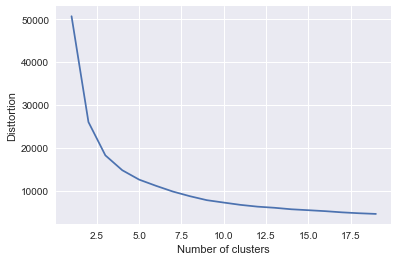

In [31]:
plt.plot(range(1,20),dist_list,marker='+')
plt.xlabel("Number of clusters")
plt.ylabel("Disttortion")

In [32]:
from sklearn.cluster import KMeans
X = target_df_std
kmpp = KMeans(n_clusters=5,init="random",random_state=0)
kmpp.fit(X)
label_df = pd.DataFrame(kmpp.labels_, columns=["cluster"])

In [33]:
label_df.groupby("cluster").size()

cluster
0     1284
1      349
2     3488
3    11745
4       28
dtype: int64

In [34]:
clustered_df = pd.concat([target_df, label_df], axis=1)

absense_bins = [0,5,10,15,20,25,30,35,40,50,110,1500]
cut_result = pd.cut(clustered_df.count_cart, absense_bins, right=False)
merged_clusterd_df = pd.concat([clustered_df.cluster, cut_result], axis=1)
cluster_count_0_cross_table = pd.pivot_table(merged_clusterd_df, index=["cluster"], columns=["count_cart"],aggfunc=lambda x : len(x), fill_value = 0)
display(cluster_count_0_cross_table)


absense_bins = [0,5,10,15,20,25,30,35,40,50,110,1500]
cut_result = pd.cut(clustered_df.count_conversion, absense_bins, right=False)
merged_clusterd_df = pd.concat([clustered_df.cluster, cut_result], axis=1)
cluster_count_1_cross_table = pd.pivot_table(merged_clusterd_df, index=["cluster"], columns=["count_conversion"],aggfunc=lambda x : len(x), fill_value = 0)
display(cluster_count_1_cross_table)


absense_bins = [0,50,100,150,200,250,300,1600]
cut_result = pd.cut(clustered_df.count_read, absense_bins, right=False)
merged_clusterd_df = pd.concat([clustered_df.cluster, cut_result], axis=1)
cluster_count_1_cross_table = pd.pivot_table(merged_clusterd_df, index=["cluster"], columns=["count_read"],aggfunc=lambda x : len(x), fill_value = 0)
display(cluster_count_1_cross_table)

count_cart,"[0, 5)","[5, 10)","[10, 15)","[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 50)","[50, 110)","[110, 1500)"
cluster,,,,,,,,,,,
0,25,214,488,332,156,51,13,2,3,0,0
1,1,2,9,24,56,81,63,39,52,22,0
2,1783,1437,257,11,0,0,0,0,0,0,0
3,11635,110,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,22,4


count_conversion,"[0, 5)","[5, 10)","[10, 15)","[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 50)","[50, 110)","[110, 1500)"
cluster,,,,,,,,,,,
0,464,685,126,9,0,0,0,0,0,0,0
1,11,87,143,83,19,2,3,1,0,0,0
2,3269,219,0,0,0,0,0,0,0,0,0
3,11745,0,0,0,0,0,0,0,0,0,0
4,0,1,0,2,6,2,7,4,2,3,1


count_read,"[0, 50)","[50, 100)","[100, 150)","[150, 200)","[200, 250)","[250, 300)","[300, 1600)"
cluster,,,,,,,
0,17,156,278,330,198,152,153
1,0,6,9,31,36,43,224
2,407,1432,1029,419,153,35,13
3,10266,1448,31,0,0,0,0
4,0,0,1,0,2,1,24


In [35]:
for i in range(0,5):
    display_df = pd.DataFrame()
    display_target_df = clustered_df[clustered_df["cluster"] == i][["count_cart","count_conversion","count_read"]]
    if display_df.empty:
        display_df = display_target_df.describe().T
    else:
        display_df = pd.concat([display_df, display_target_df.describe().T])
    display(display_df)
    print("cluster_" + str(i))

,count,mean,std,min,25%,50%,75%,max
count_cart,1284.0,14.354361,5.772767,1.0,10.00,14.0,18.0,45.0
count_conversion,1284.0,5.804517,2.814052,0.0,4.00,5.0,7.0,19.0
count_read,1284.0,193.270249,92.192330,14.0,125.75,179.0,244.0,628.0


cluster_0


,count,mean,std,min,25%,50%,75%,max
count_cart,349.0,31.507163,11.605492,4.0,24.0,30.0,37.0,79.0
count_conversion,349.0,12.573066,4.958270,2.0,9.0,12.0,15.0,36.0
count_read,349.0,380.020057,185.524086,61.0,262.0,351.0,470.0,1421.0


cluster_1


,count,mean,std,min,25%,50%,75%,max
count_cart,3488.0,4.758314,3.064326,0.0,2.0,4.0,7.0,19.0
count_conversion,3488.0,2.005161,1.455969,0.0,1.0,2.0,3.0,9.0
count_read,3488.0,104.949828,52.014856,11.0,67.0,96.0,133.0,425.0


cluster_2


,count,mean,std,min,25%,50%,75%,max
count_cart,11745.0,0.372925,0.934804,0.0,0.0,0.0,0.0,8.0
count_conversion,11745.0,0.158280,0.432300,0.0,0.0,0.0,0.0,4.0
count_read,11745.0,22.966539,21.058263,1.0,6.0,17.0,34.0,104.0


cluster_3


,count,mean,std,min,25%,50%,75%,max
count_cart,28.0,79.821429,27.684805,13.0,61.00,79.0,91.25,141.0
count_conversion,28.0,36.285714,24.150542,7.0,22.25,31.0,38.25,124.0
count_read,28.0,680.142857,289.582549,148.0,496.00,685.0,896.75,1231.0


cluster_4


## ユーザーベース

In [36]:
c_dfs= []
for df_item in dfs:
    new_df = pd.DataFrame(df_item["df"].groupby("user_id").size(), columns=["count_" + str(df_item["id"])])
    dic = {"id":df_item["id"], "label":df_item["label"], "df":new_df}
    c_dfs.append(dic)
count_df = pd.concat([c_dfs[0]["df"],c_dfs[1]["df"],c_dfs[2]["df"],c_dfs[3]["df"]], axis=1).fillna(0)
count_df.columns=['count_cart','count_read','count_click','count_conversion']
count_df.head()

,count_cart,count_read,count_click,count_conversion
0000000_B,0.0,44.0,0.0,0.0
0000001_B,1.0,70.0,0.0,1.0
0000002_B,2.0,23.0,0.0,1.0
0000003_B,0.0,25.0,0.0,0.0
0000004_B,0.0,21.0,0.0,0.0


In [37]:
display(count_df.corr())

,count_cart,count_read,count_click,count_conversion
count_cart,1.000000,0.070774,0.029158,0.631207
count_read,0.070774,1.000000,0.012445,0.049143
count_click,0.029158,0.012445,1.000000,0.012938
count_conversion,0.631207,0.049143,0.012938,1.000000


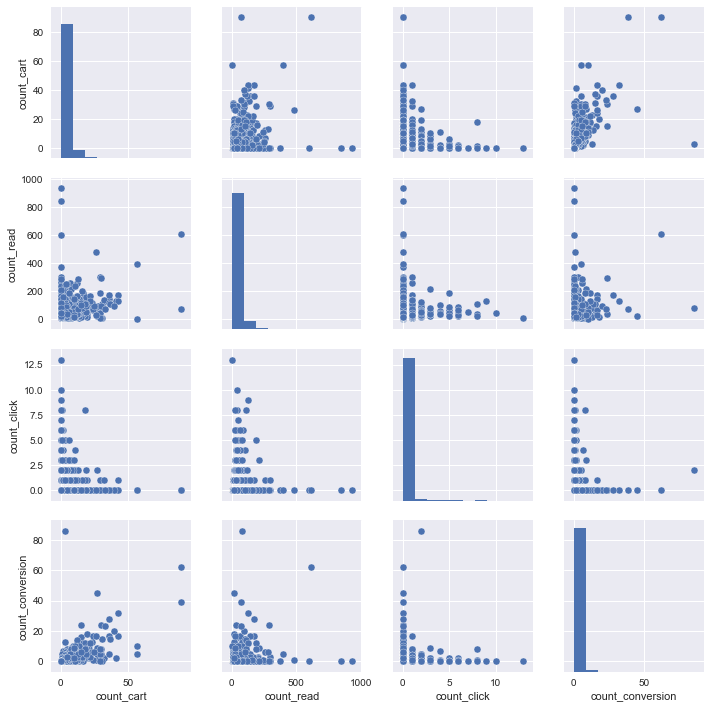

In [38]:
df_sampled = count_df.sample(n=3000, random_state=3)
sns.pairplot(df_sampled[['count_cart', 'count_read','count_click', 'count_conversion']])
sns.plt.show()

In [39]:
target_df = count_df.reset_index().rename(columns={"index":"product_id"})
target_df.head()

,product_id,count_cart,count_read,count_click,count_conversion
0,0000000_B,0.0,44.0,0.0,0.0
1,0000001_B,1.0,70.0,0.0,1.0
2,0000002_B,2.0,23.0,0.0,1.0
3,0000003_B,0.0,25.0,0.0,0.0
4,0000004_B,0.0,21.0,0.0,0.0


In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(target_df[["count_cart","count_read","count_conversion"]])
target_df_std = sc.transform(target_df[["count_cart","count_read","count_conversion"]])

In [41]:
from sklearn.cluster import KMeans
X = target_df_std
dist_list =[]
for i in range(1,20):
    kmpp = KMeans(n_clusters=i,init="random",n_init=5,max_iter=100,random_state=0) 
    kmpp.fit(X)
    dist_list.append(kmpp.inertia_) 

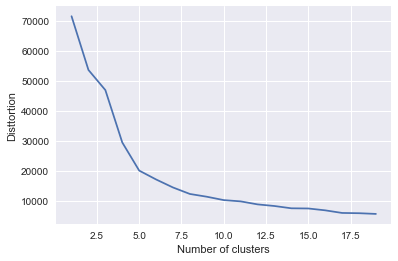

In [42]:
plt.plot(range(1,20),dist_list,marker='+')
plt.xlabel("Number of clusters")
plt.ylabel("Disttortion")

In [43]:
from sklearn.cluster import KMeans
X = target_df_std
kmpp = KMeans(n_clusters=3,init="random",random_state=0)
kmpp.fit(X)
label_df = pd.DataFrame(kmpp.labels_, columns=["cluster"])


In [44]:
label_df.groupby("cluster").size()

cluster
0    20003
1     3640
2      200
dtype: int64

In [45]:
clustered_df = pd.concat([target_df, label_df], axis=1)

absense_bins = [0,5,10,15,20,25,30,35,40,45,50,550]
cut_result = pd.cut(clustered_df.count_cart, absense_bins, right=False)
merged_clusterd_df = pd.concat([clustered_df.cluster, cut_result], axis=1)
cluster_count_0_cross_table = pd.pivot_table(merged_clusterd_df, index=["cluster"], columns=["count_cart"],aggfunc=lambda x : len(x), fill_value = 0)
display(cluster_count_0_cross_table)

absense_bins = [0,5,10,15,20,25,30,35,40,45,50,550]
cut_result = pd.cut(clustered_df.count_conversion, absense_bins, right=False)
merged_clusterd_df = pd.concat([clustered_df.cluster, cut_result], axis=1)
cluster_count_1_cross_table = pd.pivot_table(merged_clusterd_df, index=["cluster"], columns=["count_conversion"],aggfunc=lambda x : len(x), fill_value = 0)
display(cluster_count_1_cross_table)

absense_bins = [0,50,100,150,200,250,300,350,400,450,500,550]
cut_result = pd.cut(clustered_df.count_read, absense_bins, right=False)
merged_clusterd_df = pd.concat([clustered_df.cluster, cut_result], axis=1)
cluster_count_1_cross_table = pd.pivot_table(merged_clusterd_df, index=["cluster"], columns=["count_read"],aggfunc=lambda x : len(x), fill_value = 0)
display(cluster_count_1_cross_table)

count_cart,"[0, 5)","[5, 10)","[10, 15)","[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 550)"
cluster,,,,,,,,,,,
0,19636,367,0,0,0,0,0,0,0,0,0
1,304,2055,828,330,88,23,11,1,0,0,0
2,7,1,6,25,37,37,22,26,14,5,20


count_conversion,"[0, 5)","[5, 10)","[10, 15)","[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 550)"
cluster,,,,,,,,,,,
0,19996,7,0,0,0,0,0,0,0,0,0
1,2693,849,88,10,0,0,0,0,0,0,0
2,28,33,60,38,21,8,2,3,2,1,4


count_read,"[0, 50)","[50, 100)","[100, 150)","[150, 200)","[200, 250)","[250, 300)","[300, 350)","[350, 400)","[400, 450)","[450, 500)","[500, 550)"
cluster,,,,,,,,,,,
0,16193,2985,513,157,66,23,11,16,5,5,5
1,2196,1034,232,80,44,29,10,3,7,3,1
2,59,60,39,12,10,4,4,3,1,1,0


In [46]:
for i in range(0,3):
    display_df = pd.DataFrame()
    display_target_df = clustered_df[clustered_df["cluster"] == i][["count_cart","count_conversion","count_read"]]
    if display_df.empty:
        display_df = display_target_df.describe().T
    else:
        display_df = pd.concat([display_df, display_target_df.describe().T])
    display(display_df)
    print("cluster_" + str(i))

,count,mean,std,min,25%,50%,75%,max
count_cart,20003.0,0.655752,1.249688,0.0,0.0,0.0,1.0,6.0
count_conversion,20003.0,0.292506,0.627804,0.0,0.0,0.0,0.0,6.0
count_read,20003.0,38.799230,47.283904,4.0,20.0,29.0,44.0,1787.0


cluster_0


,count,mean,std,min,25%,50%,75%,max
count_cart,3640.0,9.089560,4.627742,0.0,6.0,8.0,11.0,35.0
count_conversion,3640.0,3.479945,2.459372,0.0,2.0,3.0,5.0,17.0
count_read,3640.0,56.457692,51.723219,0.0,27.0,42.0,67.0,631.0


cluster_1


,count,mean,std,min,25%,50%,75%,max
count_cart,200.0,32.18,23.135989,0.0,21.00,28.0,37.00,224.0
count_conversion,200.0,15.96,23.656852,0.0,8.00,13.0,17.00,302.0
count_read,200.0,270.15,1278.799491,0.0,42.75,81.0,132.25,12335.0


cluster_2


## 行動履歴

- 基本的に閲覧、カート、購入の流れだが、一部クリックもある。　　
- クリックのタイミングはまちまち　　
- 購入後の閲覧、カート投入後の閲覧も少数だが見られる。


In [47]:
ex_history_df=df.sort_values(by=["user_id","product_id","time_stamp"],ascending=[True,True,True])
a=ex_history_df.duplicated('product_id',keep=False)
b=ex_history_df[a]
history_df=b.drop_duplicates(['user_id','event_type','product_id'])
c=history_df.duplicated(["product_id","user_id"],keep=False) 
history_df[c]

,user_id,product_id,event_type,ad,time_stamp
69853,0000001_B,00005112_b,1,-1,2017-04-20 10:44:45.098
69857,0000001_B,00005112_b,0,-1,2017-04-20 11:36:14.525
69858,0000001_B,00005112_b,3,0,2017-04-20 11:40:06.299
86608,0000002_B,00003226_b,1,-1,2017-04-23 14:43:57.737
86611,0000002_B,00003226_b,0,-1,2017-04-23 14:51:54.039
86612,0000002_B,00003226_b,3,0,2017-04-23 14:55:01.270
217373,0000006_B,00012852_b,1,-1,2017-04-25 01:54:39.311
217378,0000006_B,00012852_b,0,-1,2017-04-25 01:56:41.591
217348,0000006_B,00013865_b,1,-1,2017-04-01 03:12:44.074
217353,0000006_B,00013865_b,0,-1,2017-04-01 03:18:30.996


In [61]:
ex_history_df=df.sort_values(by=["user_id","product_id","time_stamp"],ascending=[True,True,True])
a=ex_history_df.duplicated('product_id',keep=False)
b=ex_history_df[a]
c=b.duplicated(["product_id","user_id"],keep=False) 
history_df = b[c]

In [60]:
history=history_df.groupby(['user_id','product_id','event_type']).count()
history

Time
user_id   product_id event_type      
0000000_B 00001472_b 1              1
          00004491_b 1              1
          00006305_b 1              1
          00008327_b 1              1
          00009992_b 1              1
          00011210_b 1              1
          00012030_b 1              1
          00015686_b 1              1
0000001_B 00003000_b 1              1
          00005112_b 0              1
                     1              1
                     3              1
          00005998_b 1              1
          00007379_b 1              1
          00009275_b 1              1
          00010435_b 1              1
          00010669_b 1              1
          00012700_b 1              1
0000002_B 00000843_b 1              1
          00001549_b 1              1
          00001756_b 1              1
          00003226_b 0              1
                     1              1
                     3              1
          00006762_b 1              1
          00016078_b 1              1
0000003_B 00004779_b 1              1
          00006525_b 1              1
          00009014_b 1              1
          00010275_b 1              1
...                               ...
0023839_B 00016665_b 1              1
0023840_B 00002544_b 1              1
          00002805_b 1              1
          00002945_b 1              1
          00004558_b 1              1
          00006786_b 1              1
          00008183_b 0              1
                     1              1
                     3              1
          00008207_b 1              1
          00008811_b 1              1
          00010781_b 0              1
                     1              1
          00010868_b 1              1
          00011761_b 1              1
          00013575_b 1              1
          00014371_b 1              1
          00015448_b 1              1
0023841_B 00007541_b 1              1
0023842_B 00000564_b 1              1
          00002172_b 1              1
          00003486_b 1              1
          00003862_b 1              1
          00007237_b 1              1
          00007943_b 1              1
          00013301_b 0              1
                     1              1
          00013632_b 0              1
                     1              1
                     3              1

[250644 rows x 1 columns]

In [62]:
history_df

,user_id,product_id,event_type,ad,time_stamp
42,0000000_B,00001472_b,1,-1,2017-04-24 03:52:57.774
43,0000000_B,00001472_b,1,-1,2017-04-24 03:53:42.731
2,0000000_B,00004491_b,1,-1,2017-04-01 03:56:31.945
0,0000000_B,00004491_b,1,-1,2017-04-01 03:57:12.488
1,0000000_B,00004491_b,1,-1,2017-04-01 10:15:21.492
3,0000000_B,00004491_b,1,-1,2017-04-24 03:36:28.216
14,0000000_B,00006305_b,1,-1,2017-04-01 09:39:02.221
16,0000000_B,00006305_b,1,-1,2017-04-01 09:39:14.018
15,0000000_B,00006305_b,1,-1,2017-04-01 09:43:56.154
22,0000000_B,00006305_b,1,-1,2017-04-15 03:46:11.221


In [ ]:
len(history_df.index)

In [73]:
history_df['Counts'] = history_df.groupby(['event_type','product_id','user_id']).transform("count")

/Users/yasutakenaoki/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
history_df=history_df.drop_duplicates(["user_id","product_id","event_type"])

In [77]:
history_df.ix[:,['user_id','product_id','event_type','Counts','time_stamp','ad']]

/Users/yasutakenaoki/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


,user_id,product_id,event_type,Counts,time_stamp,ad
42,0000000_B,00001472_b,1,2.0,2017-04-24 03:52:57.774,-1
2,0000000_B,00004491_b,1,4.0,2017-04-01 03:56:31.945,-1
14,0000000_B,00006305_b,1,14.0,2017-04-01 09:39:02.221,-1
41,0000000_B,00008327_b,1,2.0,2017-04-24 03:55:58.305,-1
4,0000000_B,00009992_b,1,4.0,2017-04-01 10:18:00.540,-1
12,0000000_B,00011210_b,1,4.0,2017-04-01 03:58:26.498,-1
9,0000000_B,00012030_b,1,2.0,2017-04-01 10:15:08.773,-1
37,0000000_B,00015686_b,1,5.0,2017-04-24 03:40:36.065,-1
69878,0000001_B,00003000_b,1,2.0,2017-04-20 10:25:15.631,-1
69853,0000001_B,00005112_b,1,18.0,2017-04-20 10:44:45.098,-1
